# Students data

## Data description

enrollments.csv:

Data about a random subset of Data Analyst Nanodegree students who complete
their first project and a random subset of students who do not.

Columns:
    - account_key:    A unique identifier for the account of the student who
                     enrolled.

    - status:         The enrollment status of the student at the time the data
                      was collected. Possible values are 'canceled' and
                      'current'.

    - join_date:      The date the student enrolled.

    - cancel_date:    The date the student canceled, or blank if the student has
                      not yet canceled.

    - days_to_cancel: The number of days between join_date and cancel_date, or
                      blank if the student has not yet canceled.

    - is_udacity:     True if the account is a Udacity test account, False
                      otherwise.

    - is_canceled:    True if the student had canceled this enrollment at the
                      time the data was collected, False otherwise.

-------------------------------------------------------------------------------

daily_engagement.csv:

Data about engagement within Data Analyst Nanodegree courses for each student in
the enrollment table on each day they were enrolled. Includes a record even if
there was no engagement that day. Includes engagement data from both the
supporting courses for the Nanodegree program, and the corresponding freely
available courses with the same content.

Columns:
    - acct:                  A unique identifier for the account of the student
                             whose engagement data this is.

    - utc_date:              The date for which the data was collected.

    - num_courses_visited:   The total number of Data Analyst Nanodegree courses
                             the student visited for at 2 minutes on this day.
                             Nanodegree courses and freely available courses
                             with the same content are counted separately.

    - total_minutes_visited: The total number of minutes the student spent
                             taking Data Analyst Nanodegree courses on this day.

    - lessons_completed:     The total number of lessons within Data Analyst
                             Nanodegree courses on this day.

    - projects_completed:    The total number of Data Analyst Nanodegree
                             projects the student completed on this day.

-------------------------------------------------------------------------------

project_submissions.csv:

Data about submissions for Data Analyst Nanodegree projects for each student in
the enrollment table.

Columns:
    - creation_date:    The date the project was submitted.

    - completion_date:  The date the project was evaluated.

    - assigned_rating:  This column has 4 possible values:
                        blank - Project has not yet been evaluated.
                        INCOMPLETE - Project did not meet specifications.
                        PASSED - Project met specifications.
                        DISTINCTION - Project exceeded specifications.
                        UNGRADED - The submission could not be evaluated
                                   (e.g. contained a corrupted file)

    - account_key:      A unique identifier for the account of the student who
                        submitted the project.

    - lesson_key:       A unique identifier for the project that was submitted.

    - processing_state: This column has 2 possible values:
                        CREATED - Project has been submitted but not evaluated.
                        EVALUATED - Project has been evaluated.

-------------------------------------------------------------------------------

daily_engagement_full.csv:

Similar to daily_engagement.csv, but with engagement further broken down by
course and with more columns available. This file is about 500 megabytes, which
is why the smaller daily_engagement.csv file was created. This dataset is
optional; it is not needed to complete the course.

In addition to the following columns, this table also contains all the same
columns as daily_engagement.csv, except with has_visited instead of
num_courses_visited.

Columns:
    - registration_date:  Date the account was registered.

    - subscription_start: Date paid subscription for the account started.

    - course_key:         Course in which activity is recorded.

    - sibling_key:        Free course with the same free content as course_key.
                          If course_key is a free course, course_key and
                          sibling_key are the same.

    - course_title:       Title of the course.

    - has_visited:        1 if the student visited this course for at least 2
                          minutes on this day.



## Read data

In [1]:
import csv

def open_csv(file_name):
    with open(file_name, "rt") as f:
        reader = csv.DictReader(f)
        return list(reader)

enrollments = open_csv("./enrollments.csv")
daily_engagement = open_csv("./daily_engagement.csv")
project_submissions = open_csv("./project_submissions.csv")

In [2]:
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [3]:
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [4]:
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Convert data types

In [5]:
from datetime import datetime as dt

def parse_date(date):
    if date == "":
        return None
    else:
        return dt.strptime(date, "%Y-%m-%d")
    
def parse_int(i):
    if i == "":
        return None
    else:
        return int(i)

def parse_float(f):
    if f == "":
        return None
    else:
        return float(f)
    
def parse_bool(b):
    if b == 'True':
        return True
    else:
        return False

In [6]:
for enrollment in enrollments:
    enrollment["account_key"] = parse_int(enrollment["account_key"])
    enrollment["join_date"] = parse_date(enrollment["join_date"])
    enrollment["cancel_date"] = parse_date(enrollment["cancel_date"])
    enrollment["days_to_cancel"] = parse_int(enrollment["days_to_cancel"])
    enrollment["is_udacity"] = parse_bool(enrollment["is_udacity"])
    enrollment["is_canceled"] = parse_bool(enrollment["is_canceled"])
    
for engagement in daily_engagement:
    engagement["account_key"] = parse_int(engagement["acct"])
    del engagement["acct"]
    engagement["utc_date"] = parse_date(engagement["utc_date"])
    engagement["num_courses_visited"] = int(parse_float(engagement["num_courses_visited"]))
    engagement["total_minutes_visited"] = parse_float(engagement["total_minutes_visited"])
    engagement["lessons_completed"] = int(parse_float(engagement["lessons_completed"]))
    engagement["projects_completed"] = int(parse_float(engagement["projects_completed"]))
    if engagement["num_courses_visited"] > 0:
        engagement["has_visited"] = 1
    else:
        engagement["has_visited"] = 0
    
for submission in project_submissions:
    submission["creation_date"] = parse_date(submission["creation_date"])
    submission["completion_date"] = parse_date(submission["completion_date"])
    submission["account_key"] = parse_int(submission["account_key"])
    submission["lesson_key"] = parse_int(submission["lesson_key"])
    

In [7]:
enrollments[0]

OrderedDict([('account_key', 448),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [8]:
daily_engagement[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', 0),
             ('has_visited', 1)])

In [9]:
project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', 256),
             ('lesson_key', 3176718735),
             ('processing_state', 'EVALUATED')])

## Question phase

* How long to submit project?
* How do students who their projects differ from those who don't?
* How much time students spend taking classes?
* How time spent relates to lessons / projects completed?
* How engagement changes?
* How many times students submit?

## Data cleanup

In [10]:
# Let's count uniq students

def get_uniq_students(data):
    uniq_students = set()
    for item in data:
        uniq_students.add(item["account_key"])
    return uniq_students

unique_enrolments_students = get_uniq_students(enrollments)
unique_engagement_students = get_uniq_students(daily_engagement)
unique_submissions_student = get_uniq_students(project_submissions)
    
print("Number of uniq students in enrollment: ", len(unique_enrolments_students))
print("Number of uniq students in engagement: ", len(unique_engagement_students))
print("Number of uniq students in submissions: ", len(unique_submissions_student))

Number of uniq students in enrollment:  1302
Number of uniq students in engagement:  1237
Number of uniq students in submissions:  743


### Find all enrollments without any engagements

In [11]:
for enrollment in enrollments:
    if not enrollment["account_key"] in unique_engagement_students:
        print(enrollment)

OrderedDict([('account_key', 1219), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', 871), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 13, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 13, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', 1218), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 15, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 15, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', 654), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 12, 4, 0, 0)), ('cancel_date', datetime.datetime(2014, 12, 4, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', 654), ('status'

### Find problem students

In [12]:
count = 0
for enrollment in enrollments:
    student = enrollment["account_key"]
    if student not in unique_engagement_students and \
        enrollment["join_date"] != enrollment["cancel_date"]:
        count += 1
        print(enrollment)

OrderedDict([('account_key', 1304), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', 1304), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', 1101), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


In [13]:
count

3

### Those problem students are udacity test accos, lets remove them

In [14]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment["is_udacity"]:
        udacity_test_accounts.add(enrollment["account_key"])
len(udacity_test_accounts)

6

In [15]:
def remove_udacity_accounts(data):
    data_without_udacity = []
    for item in data:
        if item["account_key"] not in udacity_test_accounts:
            data_without_udacity.append(item)
    return data_without_udacity

In [16]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagements = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagements))
print(len(non_udacity_submissions))

1622
135656
3634


## Exploration phase

Find students who either:
* haven't cancelled yet
* stayed enrolled more than 7 days

In [17]:
paid_students = {}

for enrollment in non_udacity_enrollments:
    account_key = enrollment["account_key"]
    enrollment_date = enrollment["join_date"]
    if not enrollment["is_canceled"] or \
        enrollment["days_to_cancel"] > 7 and \
        (account_key not in paid_students or \
         enrollment_date > paid_students[account_key]):
        paid_students[enrollment["account_key"]] = enrollment_date

len(paid_students)

995

### List of engagement for paid students for first week

In [18]:
def within_first_week(engagement_date, join_date):
    time_delta = engagement_date - join_date
    return time_delta.days >= 0 and time_delta.days < 7

In [19]:
def remove_free_trial_cancels(data):
    new_data = []
    for item in data:
        if item["account_key"] in paid_students:
            new_data.append(item)
    return new_data


In [20]:
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagements = remove_free_trial_cancels(non_udacity_engagements)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print(len(paid_enrollments))
print(len(paid_engagements))
print(len(paid_submissions))

1293
134549
3618


In [21]:
paid_engagement_in_first_week = []

for engagement in paid_engagements:
    account_key = engagement["account_key"]
    join_date = paid_students[account_key]
    engagement_date = engagement["utc_date"]
    
    if within_first_week(engagement_date, join_date):
        paid_engagement_in_first_week.append(engagement)
        
len(paid_engagement_in_first_week)

6919

### Average time student spent and average number of lessons they finished

In [22]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for item in data:
        key = item[key_name]
        grouped_data[key].append(item)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, "account_key")

len(engagement_by_account)

995

In [23]:
def sum_grouped_items(grouped_data, prop_name):
    summed_data = {}
    for key, data in grouped_data.items():
        total = 0
        for item in data:
            total += item[prop_name]
        summed_data[key] = total
    return summed_data

In [24]:
total_minutes_by_account = sum_grouped_items(engagement_by_account, "total_minutes_visited")
total_minutes = list(total_minutes_by_account.values())

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def describe_data(array):
    print("Mean: ", np.mean(array))
    print("Standart deviation: ", np.std(array))
    print("Min: ", np.min(array))
    print("Max: ", np.max(array))
    sns.distplot(array, bins=8)
    plt.xlabel('Number of days')

Minutes spent: 
Mean:  306.70832675342825
Standart deviation:  412.99693340852957
Min:  0.0
Max:  3564.7332644989997


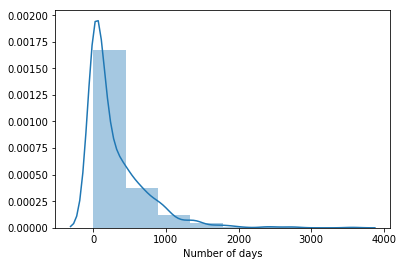

In [46]:
print("Minutes spent: ")
describe_data(total_minutes)

Lessons completed: 
Mean:  1.636180904522613
Standart deviation:  3.002561299829423
Min:  0
Max:  36


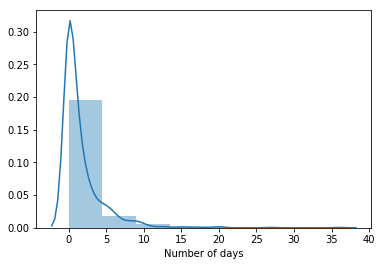

In [47]:
lessons_completed_by_account = sum_grouped_items(engagement_by_account, "lessons_completed")
print("Lessons completed: ")
describe_data(list(lessons_completed_by_account.values()))

Days visited: 
Mean:  2.8673366834170855
Standart deviation:  2.2551980029196814
Min:  0
Max:  7


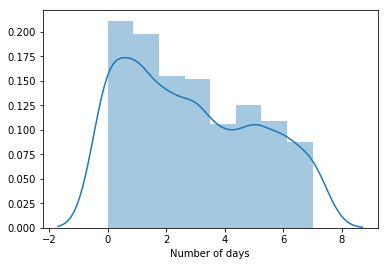

In [48]:
days_visited_by_account = sum_grouped_items(engagement_by_account, "has_visited")
print("Days visited: ")
describe_data(list(days_visited_by_account.values()))

In [49]:
# Split daily engagement into two groups, who passed subway project and who not

subway_project_lesson_keys = [746169184, 3176718735]

passing_engagement = []
non_passing_engagement = []

def is_project_passed(project):
    return project["assigned_rating"] == "PASSED" or \
        project["assigned_rating"] == "DISTINCTION"

students_who_passed_project = set()
for submission in paid_submissions:
    if submission["lesson_key"] in subway_project_lesson_keys and \
        is_project_passed(submission):
        students_who_passed_project.add(submission["account_key"])
        
len(students_who_passed_project)

647

In [50]:
for engagement in paid_engagement_in_first_week:
    if engagement["account_key"] in students_who_passed_project:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
paid_engagements[0]

OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0),
             ('account_key', 0),
             ('has_visited', 1)])

In [51]:
len(passing_engagement)

4527

In [52]:
len(non_passing_engagement)

2392

### Let's compare data between students who passed the project and who not

#### Let's compare how much time students spent

Total minutes spent by student who passed project
Mean:  394.58604648350865
Standart deviation:  448.4995193265521
Min:  0.0
Max:  3564.7332644989997


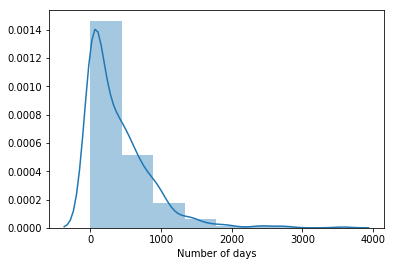

In [53]:
passing_engagement_by_account = group_data(passing_engagement, "account_key")
non_passing_engagement_by_account = group_data(non_passing_engagement, "account_key")

passing_total_minutes_visited = sum_grouped_items(passing_engagement_by_account, 
                                                  "total_minutes_visited")
non_passing_total_minutes_visited = sum_grouped_items(non_passing_engagement_by_account, 
                                                      "total_minutes_visited")

print("Total minutes spent by student who passed project")
describe_data(list(passing_total_minutes_visited.values()))

Total minutes spent by student who didn't passed project
Mean:  143.32647426675584
Standart deviation:  269.5386190114951
Min:  0.0
Max:  1768.5227493319999


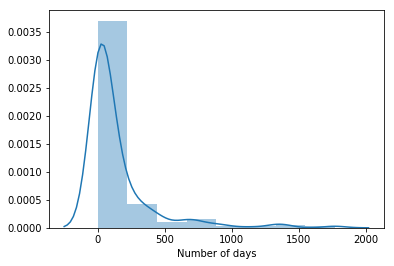

In [54]:
print("Total minutes spent by student who didn't passed project")
describe_data(list(non_passing_total_minutes_visited.values()))

#### Let's compare how many lessons students completed

Number of lessons completed by students who passed project
Mean:  2.052550231839258
Standart deviation:  3.1422270555779344
Min:  0
Max:  36


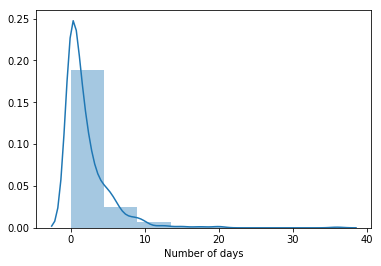

In [55]:
passing_number_of_lessons_completed = sum_grouped_items(passing_engagement_by_account,
                                      "lessons_completed")

print("Number of lessons completed by students who passed project")
describe_data(list(passing_number_of_lessons_completed.values()))

Number of lessons completed by studends who haven't passed project
Mean:  0.8620689655172413
Standart deviation:  2.5491599418312028
Min:  0
Max:  27


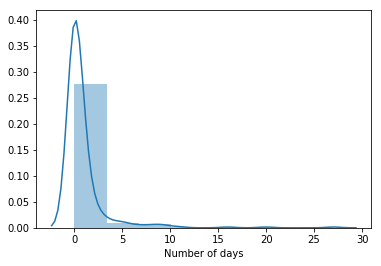

In [56]:
non_passing_number_of_lessons_completed = sum_grouped_items(non_passing_engagement_by_account,
                                                           "lessons_completed")


print("Number of lessons completed by studends who haven't passed project")
describe_data(list(non_passing_number_of_lessons_completed.values()))

#### Let's compare number of days students have visited course

Number of days students visited course
Mean:  3.384853168469861
Standart deviation:  2.2588214709184595
Min:  0
Max:  7


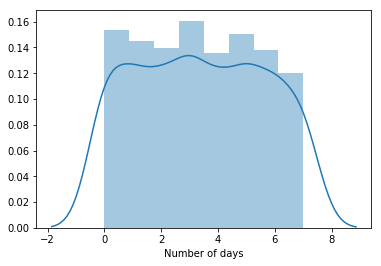

In [57]:
passing_number_of_visits = sum_grouped_items(passing_engagement_by_account,
                                            "has_visited")

print("Number of days students visited course")
describe_data(list(passing_number_of_visits.values()))

Number of days students who haven't passed project visited course
Mean:  1.9051724137931034
Standart deviation:  1.9057314413619046
Min:  0
Max:  7


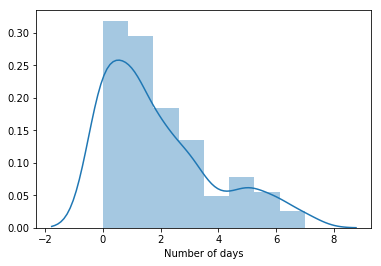

In [58]:
non_passing_number_of_visits = sum_grouped_items(non_passing_engagement_by_account,
                                                "has_visited")

print("Number of days students who haven't passed project visited course")
describe_data(list(non_passing_number_of_visits.values()))

## Conclusion

As you can see from histogram, students who passed their project, spent almost two times more time during the week. They completed more lessons and their day to day activity was high during the whole week.